In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_data = '/content/drive/MyDrive/dataset'

# Library

In [1]:
!pip install numpy==1.23.5
!pip install catboost==1.2
!pip install optuna

# EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
import re
# Modelling
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import precision_recall_curve
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifie

  Using cached catboost-1.2-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.2 MB/s eta 0:00:00


In [4]:
train = pd.read_csv(path_data + '/train.csv')
test = pd.read_csv(path_data + '/test.csv')
target = pd.read_csv(path_data + '/target.csv')

In [5]:
print('train shape', train.shape)
print('test', test.shape)
print('target', target.shape)

train shape (7000, 16)
test (3000, 17)
target (7000, 1)


In [6]:
train

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
0,NORWAY,RO,127731,Sports,NaN,smartphone,True,True,low,99.0,14.017220,160.400000,4.0,medium,low,low
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,NaN,NaN,99.0,NaN,17.500000,0.0,NaN,low,low
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,True,low,0.0,31.883163,30.766667,4.0,NaN,low,low
3,GERMANY,GLOBAL,1074,Games,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,71.533333,4.0,NaN,low,low
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,NaN,NaN,99.0,NaN,52.400000,4.0,NaN,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Utilities,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,26.266667,0.0,NaN,low,low
6996,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Business,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,23.800000,0.0,NaN,low,low
6997,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Personalization,10 - 50,GLOBAL,True,NaN,NaN,0.0,NaN,27.500000,NaN,NaN,medium,low
6998,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Business,10 - 50,GLOBAL,True,False,high,99.0,NaN,124.033333,0.0,NaN,low,low


In [7]:
print(f"Jumlah baris train: {train.shape[0]}")
print(f"Jumlah baris target: {target.shape[0]}")

# Menggabungkan train dengan target
if train.shape[0] == target.shape[0]:
    # Jika target adalah DataFrame dengan satu kolom
    if target.shape[1] == 1:
        column_name = target.columns[0]  # Mendapatkan nama kolom target
        train[column_name] = target.values
    else:
        # Menggabungkan semua kolom dari target
        train = pd.concat([train, target], axis=1)

    print("Data berhasil digabungkan!")
else:
    print("Error: Jumlah baris pada data train dan target tidak sama!")

# Melihat hasil
print(train.head())

Jumlah baris train: 7000
Jumlah baris target: 7000
Data berhasil digabungkan!
                  developerCountry countryCode  userRatingCount  \
0                           NORWAY          RO           127731   
1  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2             UNITED ARAB EMIRATES          CZ            51143   
3                          GERMANY      GLOBAL             1074   
4          CANNOT IDENTIFY COUNTRY      GLOBAL               17   

  primaryGenreName             downloads  deviceType hasPrivacyLink  \
0           Sports                   NaN  smartphone           True   
1          Medical              50 - 100      GLOBAL           True   
2            Games  50000000 - 100000000      GLOBAL           True   
3            Games                   NaN      GLOBAL           True   
4            Tools           1000 - 5000      GLOBAL           True   

  hasTermsOfServiceLink hasTermsOfServiceLinkRating  isCorporateEmailScore  \
0             

In [8]:
train

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk
0,NORWAY,RO,127731,Sports,NaN,smartphone,True,True,low,99.0,14.017220,160.400000,4.0,medium,low,low,False
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,NaN,NaN,99.0,NaN,17.500000,0.0,NaN,low,low,False
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,True,low,0.0,31.883163,30.766667,4.0,NaN,low,low,False
3,GERMANY,GLOBAL,1074,Games,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,71.533333,4.0,NaN,low,low,False
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,NaN,NaN,99.0,NaN,52.400000,4.0,NaN,low,low,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Utilities,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,26.266667,0.0,NaN,low,low,False
6996,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Business,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,23.800000,0.0,NaN,low,low,False
6997,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Personalization,10 - 50,GLOBAL,True,NaN,NaN,0.0,NaN,27.500000,NaN,NaN,medium,low,False
6998,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Business,10 - 50,GLOBAL,True,False,high,99.0,NaN,124.033333,0.0,NaN,low,low,False


# EDA

In [9]:
train.shape

(7000, 17)

In [10]:
print(train.dtypes)

developerCountry                    object
countryCode                         object
userRatingCount                      int64
primaryGenreName                    object
downloads                           object
deviceType                          object
hasPrivacyLink                      object
hasTermsOfServiceLink               object
hasTermsOfServiceLinkRating         object
isCorporateEmailScore              float64
adSpent                            float64
appAge                             float64
averageUserRating                  float64
appContentBrandSafetyRating         object
appDescriptionBrandSafetyRating     object
mfaRating                           object
coppaRisk                             bool
dtype: object


In [11]:
print('=============== TRAIN SET ==============')
print(train.isnull().sum())
print(train.duplicated().sum())
print('=============== TEST SET ===============')
print(test.isnull().sum())
print(test.duplicated().sum())

=============== TRAIN SET ==============
developerCountry                      0
countryCode                          64
userRatingCount                       0
primaryGenreName                      0
downloads                          2149
deviceType                            0
hasPrivacyLink                      750
hasTermsOfServiceLink              4635
hasTermsOfServiceLinkRating        4635
isCorporateEmailScore              1128
adSpent                            5679
appAge                               50
averageUserRating                  1232
appContentBrandSafetyRating        6162
appDescriptionBrandSafetyRating       0
mfaRating                             0
coppaRisk                             0
dtype: int64
3
=============== TEST SET ===============
ID                                    0
developerCountry                      0
countryCode                          29
userRatingCount                       0
primaryGenreName                      0
downloads              

In [12]:
print(train.nunique())

developerCountry                    114
countryCode                         119
userRatingCount                    1528
primaryGenreName                     46
downloads                            26
deviceType                            5
hasPrivacyLink                        2
hasTermsOfServiceLink                 2
hasTermsOfServiceLinkRating           2
isCorporateEmailScore                 2
adSpent                            1321
appAge                             3194
averageUserRating                     6
appContentBrandSafetyRating           3
appDescriptionBrandSafetyRating       3
mfaRating                             3
coppaRisk                             2
dtype: int64


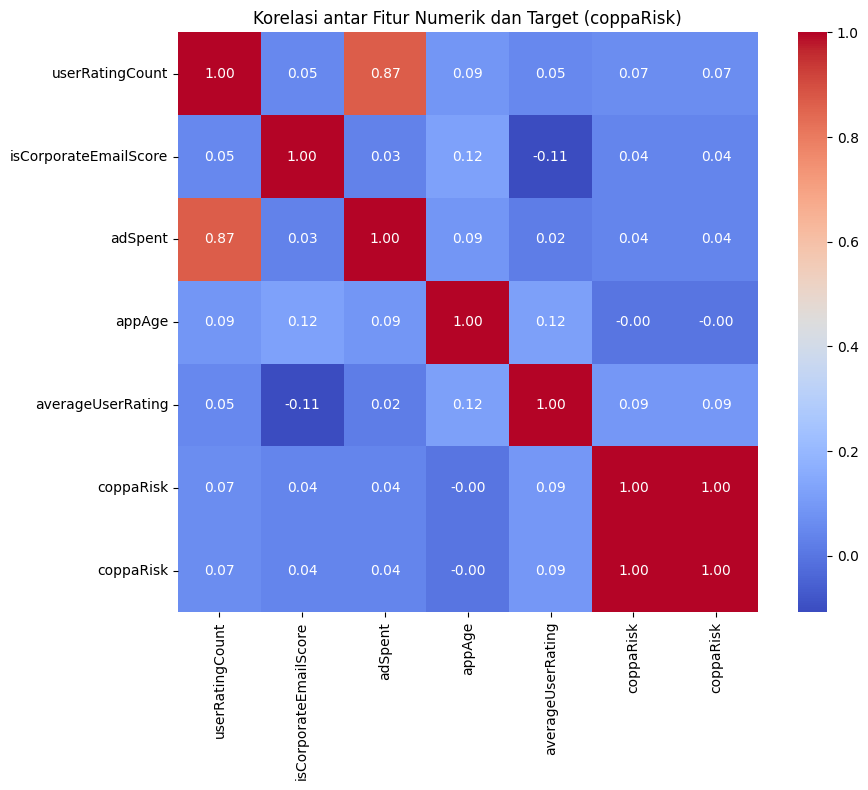

In [13]:
eda = train.copy()

eda['coppaRisk'] = eda['coppaRisk'].astype(int)

numeric_cols = eda.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.append('coppaRisk')

df_num = eda[numeric_cols]

corr_matrix = df_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Korelasi antar Fitur Numerik dan Target (coppaRisk)')
plt.tight_layout()
plt.show()

In [14]:
cols_to_check = ['hasTermsOfServiceLink', 'hasTermsOfServiceLinkRating']
for col in cols_to_check:
    distribusi = eda[col].value_counts(normalize=True, dropna=False).mul(100).rename('percentage').reset_index()
    distribusi.columns = [col, 'percentage']
    print(f"\nDistribusi persentase untuk kolom: {col}")
    print(distribusi)



Distribusi persentase untuk kolom: hasTermsOfServiceLink
  hasTermsOfServiceLink  percentage
0                   NaN   66.214286
1                 False   20.342857
2                  True   13.442857

Distribusi persentase untuk kolom: hasTermsOfServiceLinkRating
  hasTermsOfServiceLinkRating  percentage
0                         NaN   66.214286
1                        high   20.342857
2                         low   13.442857


In [15]:
# Look at the unique values and some samples
print(eda['downloads'].unique()[:10])
print("\nValue counts:")
print(eda['downloads'].value_counts().head(10))

[nan '50 - 100' '50000000 - 100000000' '1000 - 5000' '1 - 5' '100 - 500'
 '10000 - 50000' '50000 - 100000' '10 - 50' '5 - 10']

Value counts:
downloads
100 - 500            699
10 - 50              673
1000 - 5000          591
10000 - 50000        396
500 - 1000           324
50 - 100             310
100000 - 500000      270
1000000 - 5000000    248
1 - 5                221
5 - 10               201
Name: count, dtype: int64


In [16]:
pd.set_option('display.float_format', '{:.2f}'.format)
eda['adSpent'].describe()

,adSpent
count,1321.00
mean,3977.56
std,92199.19
min,0.01
25%,1.09
50%,7.95
75%,49.08
max,3143906.13


In [17]:
eda['downloads'].value_counts()

,count
downloads,
100 - 500,699
10 - 50,673
1000 - 5000,591
10000 - 50000,396
500 - 1000,324
50 - 100,310
100000 - 500000,270
1000000 - 5000000,248
1 - 5,221


In [18]:
import re

def clean_downloads(val):
    if pd.isnull(val):
        return val

    val = re.sub(r'\s*-\s*', '-', str(val))  # hapus spasi
    match = re.match(r'^(\d+)-(\d+)$', val)

    if match:
        a, b = sorted([int(match.group(1)), int(match.group(2))])
        range_str = f"{a}-{b}"

        # Penyesuaian untuk rentang kecil dan overlap
        if range_str in ['0-1', '1-1']:
            return '1-5'
        elif range_str == '1-10':
            return '5-10'
        elif range_str == '1-500':
            return '100-500'
        elif range_str == '1-50':
            return '10-50'
        else:
            return f"{a}-{b}"

    return val

# Terapkan ke kolom
eda['downloads_clean'] = eda['downloads'].apply(clean_downloads)

In [19]:
eda['downloads_clean'].value_counts()

,count
downloads_clean,
100-500,700
10-50,674
1000-5000,591
10000-50000,396
500-1000,324
50-100,310
1-5,299
100000-500000,270
1000000-5000000,248


In [20]:
eda[eda['userRatingCount'] == 0]['downloads'].value_counts()

,count
downloads,
10 - 50,634
100 - 500,515
50 - 100,268
1 - 5,220
5 - 10,200
500 - 1000,164
1000 - 5000,133
0 - 1,63
10000 - 50000,31


##A. developerCountry

In [21]:
set(eda['developerCountry'].dropna().unique()) - set(test['developerCountry'].dropna().unique())

{'ALBANIA',
 'ALGERIA',
 'ANDORRA',
 'ANGOLA',
 'BAHRAIN',
 'BELGIUM',
 'BELIZE',
 'BRITISH VIRGIN ISLANDS',
 'BRUNEI DARUSSALAM',
 'BURUNDI',
 'CAYMAN ISLANDS',
 "COTE D'IVOIRE",
 'DOMINICAN REPUBLIC',
 'GHANA',
 'GIBRALTAR',
 'GREECE',
 'GREENLAND',
 'GUATEMALA',
 'HONDURAS',
 'IRAQ',
 'ISLE OF MAN',
 'KYRGYZSTAN',
 'LEBANON',
 'LITHUANIA',
 'MALDIVES',
 'MONGOLIA',
 'NICARAGUA',
 'NIGERIA',
 'OMAN',
 'PANAMA',
 'PERSONAL DATA, CAN NOT BE PUBLICLY DISCLOSED ACCORDING TO APPLICABLE LAWS.',
 'PERU',
 'PORTUGAL',
 'QATAR',
 'SENEGAL',
 'STATUTORY MASKING ENABLED',
 'TAIWAN, PROVINCE OF CHINA',
 'UZBEKISTAN',
 'VENEZUELA',
 'ZIMBABWE'}

In [22]:
set(test['developerCountry'].dropna().unique()) - set(eda['developerCountry'].dropna().unique())

{'BOSNIA AND HERZEGOVINA',
 'CAMEROON',
 'CROATIA',
 'DOMINICA',
 'MAURITIUS',
 'MONTENEGRO',
 'PARAGUAY',
 'RWANDA',
 'SAINT VINCENT AND THE GRENADINES',
 'SLOVAKIA',
 'TOGO',
 'TUNISIA',
 'UGANDA',
 'VENEZUELA (BOLIVARIAN REPUBLIC OF)',
 'VIETNAM'}

In [23]:
set(test['countryCode'].dropna().unique()) - set(eda['countryCode'].dropna().unique())

{'AL', 'ET', 'GP', 'MD', 'NE', 'NP', 'SL', 'ZW'}

In [24]:
# --- DeveloperCountry-based leakage ---
unseen_dev_country = set(test['developerCountry'].dropna().unique()) - set(eda['developerCountry'].dropna().unique())
test_leaky_dev_country = test[test['developerCountry'].isin(unseen_dev_country)]

# --- CountryCode-based leakage ---
unseen_country_code = set(test['countryCode'].dropna().unique()) - set(eda['countryCode'].dropna().unique())
test_leaky_country_code = test[test['countryCode'].isin(unseen_country_code)]

# --- Combine both (if needed) ---
test_leaky_tuples = pd.concat([test_leaky_dev_country, test_leaky_country_code]).drop_duplicates()
print (test_leaky_tuples)

        ID                    developerCountry countryCode  userRatingCount  \
188   9027              BOSNIA AND HERZEGOVINA      GLOBAL                0   
202   6742                            CAMEROON      GLOBAL                0   
237   5498                            DOMINICA      GLOBAL                0   
262   1382                            PARAGUAY          AR             3422   
654   9701                           MAURITIUS      GLOBAL                8   
1025  4112  VENEZUELA (BOLIVARIAN REPUBLIC OF)      GLOBAL               41   
1303  4837                                TOGO      GLOBAL                0   
1416  4729                             TUNISIA      GLOBAL              311   
1680  9444                              RWANDA      GLOBAL               10   
1799  3591                              UGANDA      GLOBAL                5   
1864  9510    SAINT VINCENT AND THE GRENADINES      GLOBAL                0   
1916  1736                          MONTENEGRO      

In [25]:
country_risk_ratio = (
    eda.groupby('developerCountry')['coppaRisk']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'coppaRisk_ratio', 'count': 'app_count'})
    .sort_values(by='coppaRisk_ratio', ascending=False)
)
filtered = country_risk_ratio[country_risk_ratio['app_count'] >= 5]
print(filtered)

                                 coppaRisk_ratio  app_count
developerCountry                                           
NEW ZEALAND                                 0.67          6
ESTONIA                                     0.40          5
CYPRUS                                      0.34         58
HONG KONG                                   0.29         85
SINGAPORE                                   0.29         42
PHILIPPINES                                 0.29          7
CZECH REPUBLIC                              0.25         12
POLAND                                      0.25         12
VIET NAM                                    0.22         46
UNITED ARAB EMIRATES                        0.21         39
UNITED KINGDOM                              0.20         59
KAZAKHSTAN                                  0.20          5
ROMANIA                                     0.20         10
ISRAEL                                      0.20         30
CANADA                                  

In [26]:
eda['developerCountry'].nunique()

114

In [27]:
eda['developerCountry'].fillna('MISSING').str.upper().str.contains('CANNOT IDENTIFY|ADDRESS NOT|MISSING').sum()

5107

In [28]:
# Salin dataframe
df_temp = eda.copy()

# Encode nilai kategorikal ke numerik
df_temp['hasTermsOfServiceLink'] = df_temp['hasTermsOfServiceLink'].map({'True': 1, 'False': 0})
df_temp['hasTermsOfServiceLinkRating'] = df_temp['hasTermsOfServiceLinkRating'].map({'high': 1, 'low': 0})

# Pilih kolom numerik
numeric_df = df_temp.select_dtypes(include='number')

# Hitung korelasi
correlation_terms = numeric_df.corr()[['hasTermsOfServiceLink', 'hasTermsOfServiceLinkRating']].sort_values(by='hasTermsOfServiceLink', ascending=False)

# Lihat hasil korelasi
print(correlation_terms)


                             hasTermsOfServiceLink  \
userRatingCount                                NaN   
hasTermsOfServiceLink                          NaN   
hasTermsOfServiceLinkRating                    NaN   
isCorporateEmailScore                          NaN   
adSpent                                        NaN   
appAge                                         NaN   
averageUserRating                              NaN   
coppaRisk                                      NaN   

                             hasTermsOfServiceLinkRating  
userRatingCount                                    -0.06  
hasTermsOfServiceLink                                NaN  
hasTermsOfServiceLinkRating                         1.00  
isCorporateEmailScore                              -0.19  
adSpent                                            -0.05  
appAge                                             -0.04  
averageUserRating                                  -0.02  
coppaRisk                                

In [29]:
coppa_0 = eda[eda['coppaRisk'] == 0]
distribution_percent = coppa_0['primaryGenreName'].value_counts(normalize=True) * 100
print(distribution_percent)

primaryGenreName
Games                     22.19
Business                   6.71
Entertainment              6.06
Lifestyle                  5.38
Education                  4.95
Tools                      4.87
Music & Audio              4.44
Food & Drink               4.41
Shopping                   4.25
Productivity               3.79
Health & Fitness           3.35
Utilities                  3.01
Books & Reference          2.97
Finance                    2.73
Personalization            2.63
Social                     1.59
Travel & Local             1.57
Communication              1.22
News & Magazines           1.17
Medical                    1.13
Photography                1.03
Social Networking          0.95
Maps & Navigation          0.92
Travel                     0.92
Sports                     0.81
Auto & Vehicles            0.68
News                       0.65
Art & Design               0.63
Video Players & Editors    0.62
Music                      0.56
Photo & Video          

In [30]:
# prompt: check duplicate

# Check for duplicate rows in the 'train' DataFrame
duplicate_rows = train[train.duplicated()]

# Print the number of duplicate rows
print(f"Jumlah baris duplikat: {len(duplicate_rows)}")

# Print the duplicate rows (optional)
if not duplicate_rows.empty:
    print("Baris duplikat:")
duplicate_rows

Jumlah baris duplikat: 3
Baris duplikat:


,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk
2151,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Books & Reference,1 - 5,GLOBAL,True,NaN,NaN,0.00,NaN,12.87,NaN,NaN,low,low,False
2405,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Utilities,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,8.87,0.00,NaN,high,low,False
4735,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Education,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,98.40,0.00,NaN,low,low,False


In [31]:
# Fungsi Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))


📊 Analyzing: developerCountry
→ Cramér's V: 0.2065
→ Chi-squared test p-value: 1.1085e-18

📊 Analyzing: countryCode
→ Cramér's V: 0.2431
→ Chi-squared test p-value: 6.8062e-34

📊 Analyzing: primaryGenreName
→ Cramér's V: 0.4195
→ Chi-squared test p-value: 1.2464e-228

📊 Analyzing: downloads
→ Cramér's V: 0.2277
→ Chi-squared test p-value: 2.6601e-39

📊 Analyzing: deviceType
→ Cramér's V: 0.1499
→ Chi-squared test p-value: 5.4579e-33


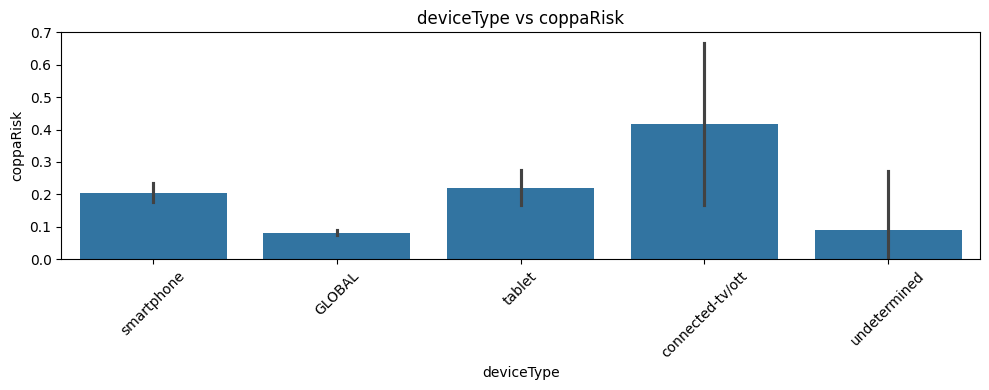


📊 Analyzing: hasPrivacyLink
→ Cramér's V: 0.0149
→ Chi-squared test p-value: 2.3977e-01


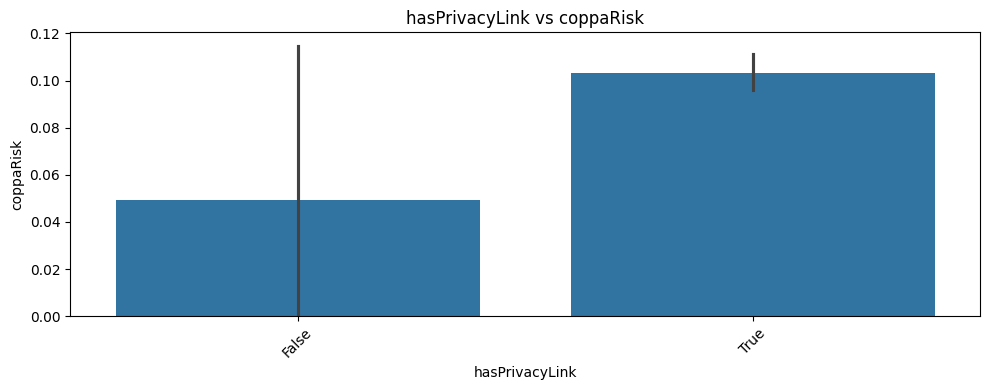


📊 Analyzing: hasTermsOfServiceLink
→ Cramér's V: 0.0340
→ Chi-squared test p-value: 9.8604e-02


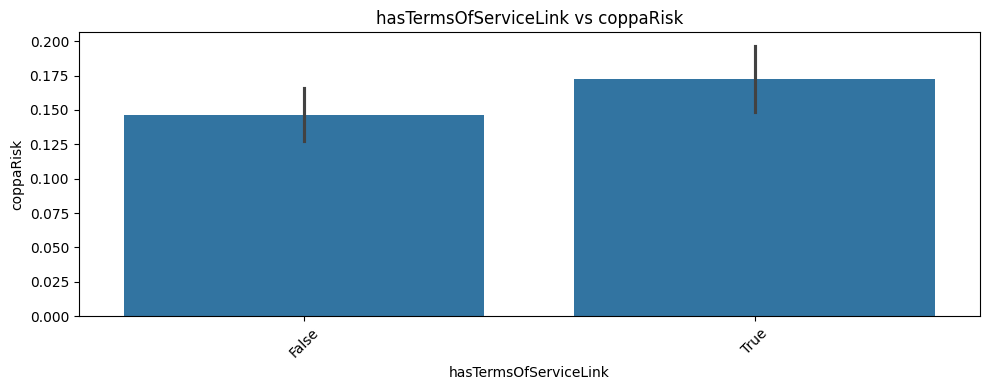


📊 Analyzing: hasTermsOfServiceLinkRating
→ Cramér's V: 0.0340
→ Chi-squared test p-value: 9.8604e-02


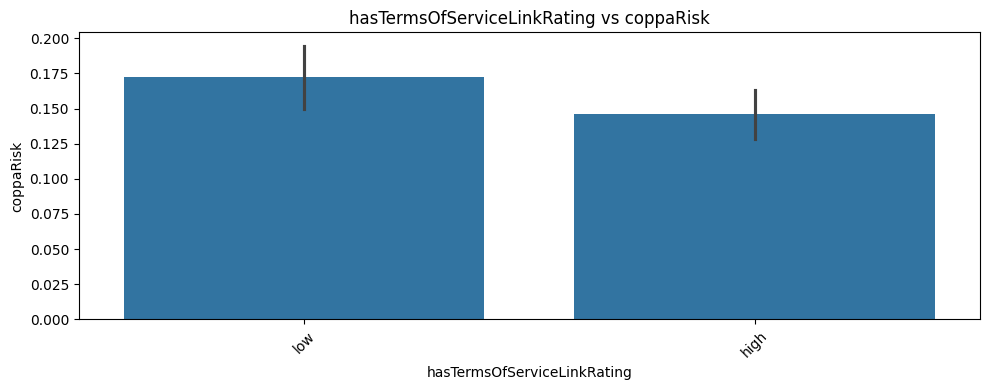


📊 Analyzing: appContentBrandSafetyRating
→ Cramér's V: 0.0378
→ Chi-squared test p-value: 5.4922e-01


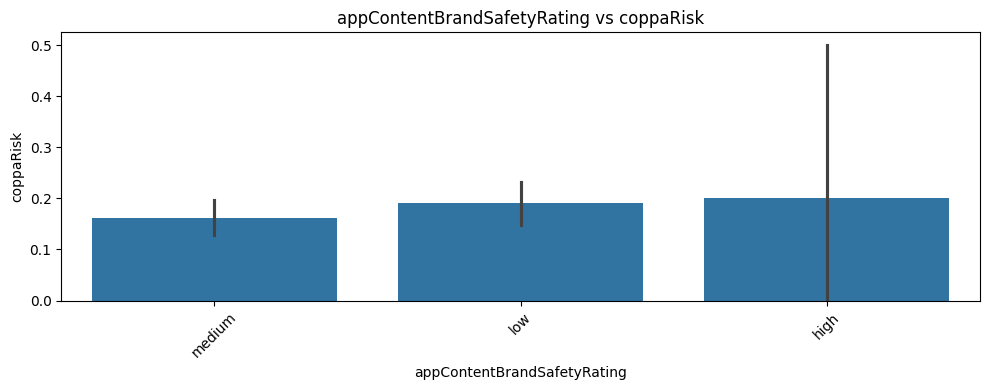


📊 Analyzing: appDescriptionBrandSafetyRating
→ Cramér's V: 0.0970
→ Chi-squared test p-value: 5.1031e-15


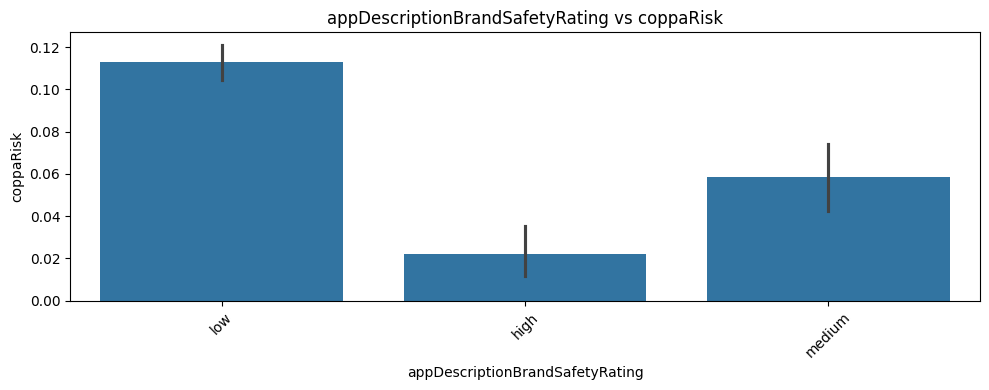


📊 Analyzing: mfaRating
→ Cramér's V: 0.0113
→ Chi-squared test p-value: 6.3835e-01


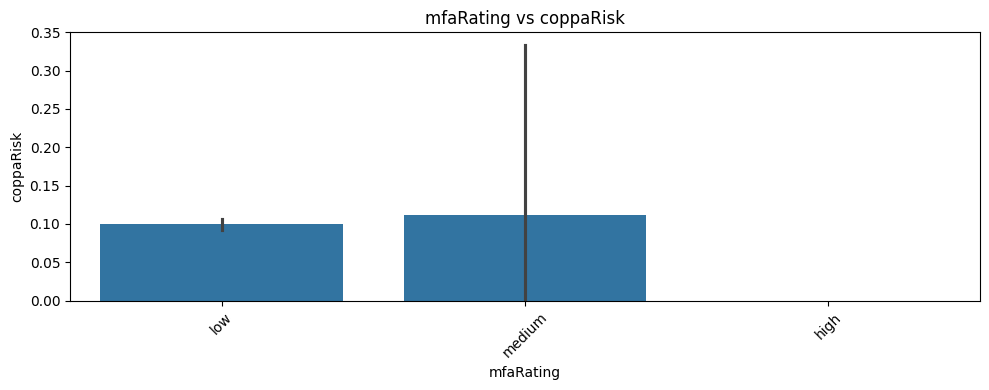

In [32]:
categorical_cols = [
    "developerCountry", "countryCode", "primaryGenreName", "downloads",
    "deviceType", "hasPrivacyLink", "hasTermsOfServiceLink",
    "hasTermsOfServiceLinkRating", "appContentBrandSafetyRating",
    "appDescriptionBrandSafetyRating", "mfaRating"
]

for col in categorical_cols:
    print(f"\n📊 Analyzing: {col}")
    # Crosstab
    ct = pd.crosstab(eda[col], eda["coppaRisk"])
    # Cramér’s V
    try:
        cramer = cramers_v(ct)
        print(f"→ Cramér's V: {cramer:.4f}")
    except:
        print("→ Cramér's V: Failed (likely due to sparse or missing data)")
    # Chi2
    try:
        chi2, p, dof, _ = chi2_contingency(ct)
        print(f"→ Chi-squared test p-value: {p:.4e}")
    except:
        print("→ Chi-squared: Failed")
    # Visualisasi
    if eda[col].nunique() < 20:
        plt.figure(figsize=(10, 4))
        sns.barplot(x=col, y="coppaRisk", data=eda)
        plt.xticks(rotation=45)
        plt.title(f"{col} vs coppaRisk")
        plt.tight_layout()
        plt.show()


Distribusi nilai dalam kolom target:
coppaRisk
False    6304
True      696
Name: count, dtype: int64

Persentase distribusi:
coppaRisk
False   90.06
True     9.94
Name: proportion, dtype: float64 %


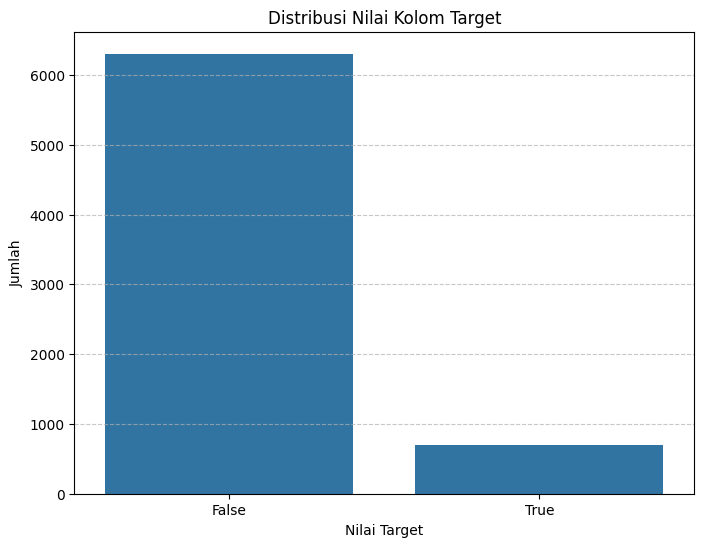

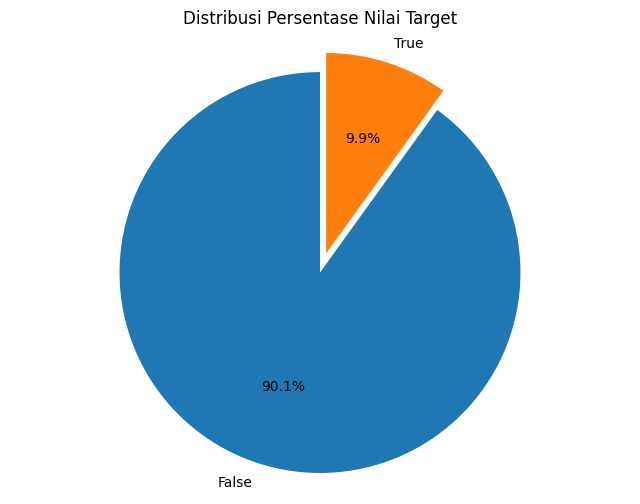

In [33]:
# Menampilkan distribusi nilai dalam kolom target
target_col_name = target.columns[0]  # Mengasumsikan kolom pertama adalah target
value_counts = target[target_col_name].value_counts()
print("Distribusi nilai dalam kolom target:")
print(value_counts)

# Persentase distribusi
percentage = target[target_col_name].value_counts(normalize=True) * 100
print("\nPersentase distribusi:")
print(percentage.round(2), "%")

plt.figure(figsize=(8, 6))
sns.countplot(x=target[target_col_name])
plt.title('Distribusi Nilai Kolom Target')
plt.ylabel('Jumlah')
plt.xlabel('Nilai Target')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualisasi pie chart
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, explode=[0.05]*len(value_counts))
plt.title('Distribusi Persentase Nilai Target')
plt.axis('equal')
plt.show()

In [34]:
# Pastikan kolom 'primaryGenreName' dan 'coppaRisk' tersedia
genre_risk = eda.groupby('primaryGenreName')['coppaRisk'].agg(
    total_apps='count',
    risky_apps='sum'
).reset_index()

# Tambahkan kolom persentase risiko
genre_risk['risky_percentage'] = genre_risk['risky_apps'] / genre_risk['total_apps'] * 100

# Urutkan berdasarkan genre yang paling berisiko
genre_risk_sorted = genre_risk.sort_values(by='risky_percentage', ascending=False)

# Tampilkan 10 genre teratas dengan risiko tertinggi
genre_risk_sorted

,primaryGenreName,total_apps,risky_apps,risky_percentage
10,Education,500,188,37.60
39,Stickers,20,5,25.00
15,Games,1828,429,23.47
29,Parenting,5,1,20.00
34,Reference,21,3,14.29
11,Entertainment,431,49,11.37
3,Book,18,2,11.11
38,Sports,54,3,5.56
0,Art & Design,42,2,4.76
41,Travel,60,2,3.33


In [36]:
print("developerCountry unique:", eda['developerCountry'].nunique())
print(eda['developerCountry'].value_counts().head(10), "\n")

print("primaryGenreName unique:", eda['primaryGenreName'].nunique())
print(eda['primaryGenreName'].value_counts().head(10), "\n")

for col in ['isCorporateEmailScore','adSpent','averageUserRating']:
    na_pct = eda[col].isna().mean()*100
    print(f"{col}  missing: {na_pct:.1f}%")

developerCountry unique: 114
developerCountry
ADDRESS NOT LISTED IN PLAYSTORE    4338
CANNOT IDENTIFY COUNTRY             769
UNITED STATES                       324
CHINA                               150
INDIA                               131
REPUBLIC OF KOREA                    95
FRANCE                               86
HONG KONG                            85
UNITED KINGDOM                       59
CYPRUS                               58
Name: count, dtype: int64 

primaryGenreName unique: 46
primaryGenreName
Games            1828
Education         500
Entertainment     431
Business          423
Lifestyle         340
Tools             308
Music & Audio     280
Food & Drink      279
Shopping          268
Productivity      240
Name: count, dtype: int64 

isCorporateEmailScore  missing: 16.1%
adSpent  missing: 81.1%
averageUserRating  missing: 17.6%


In [37]:
country_stats = (
    eda.groupby('developerCountry')['coppaRisk']
    .agg(['mean', 'count'])
    .sort_values('mean', ascending=False)
)
display(country_stats.head(30))  # Adjust number to your needs


,mean,count
developerCountry,,
ZIMBABWE,1.00,1
GREECE,1.00,1
MALDIVES,1.00,1
BELIZE,1.00,1
HONDURAS,1.00,1
"PERSONAL DATA, CAN NOT BE PUBLICLY DISCLOSED ACCORDING TO APPLICABLE LAWS.",1.00,1
NEW ZEALAND,0.67,6
MALTA,0.50,2
ESTONIA,0.40,5


# **Helper Function**

In [38]:
def custom_cv_evaluation(df, n_splits=5):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import roc_auc_score

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_scores = []

    for train_idx, val_idx in skf.split(df, df['coppaRisk']):
        train_fold = df.iloc[train_idx].reset_index(drop=True)
        val_fold   = df.iloc[val_idx].reset_index(drop=True)

        # ————————————
        # 1) Build everything (incl. your ratio map) on train only
        train_processed = custom_pipeline(train_fold, train=True)

        # 2) Apply exactly the same map to val — NO recomputing
        val_processed   = custom_pipeline(val_fold, train=False)
        # ————————————

        X_train = train_processed[categorical_cols + numerical_cols]
        y_train = train_processed['coppaRisk']
        X_val   = val_processed[categorical_cols + numerical_cols]
        y_val   = val_processed['coppaRisk']

        model = CatBoostClassifier(
            iterations=500,
            learning_rate=0.1,
            depth=6,
            eval_metric='AUC',
            cat_features=categorical_cols,
            verbose=0,
            random_state=42
        )

        model.fit(
            X_train, y_train,
            eval_set=(X_val, y_val),
            use_best_model=True,
            verbose=False
        )

        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
        cv_scores.append(roc_auc_score(y_val, y_val_pred_proba))

    return cv_scores

# 1. Split Training Set and Validation Set

In [40]:
df = eda.copy()
df

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk,downloads_clean
0,NORWAY,RO,127731,Sports,NaN,smartphone,True,True,low,99.00,14.02,160.40,4.00,medium,low,low,0,NaN
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,NaN,NaN,99.00,NaN,17.50,0.00,NaN,low,low,0,50-100
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,True,low,0.00,31.88,30.77,4.00,NaN,low,low,0,50000000-100000000
3,GERMANY,GLOBAL,1074,Games,NaN,GLOBAL,True,NaN,NaN,99.00,NaN,71.53,4.00,NaN,low,low,0,NaN
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,NaN,NaN,99.00,NaN,52.40,4.00,NaN,low,low,0,1000-5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Utilities,NaN,GLOBAL,True,NaN,NaN,99.00,NaN,26.27,0.00,NaN,low,low,0,NaN
6996,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Business,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,23.80,0.00,NaN,low,low,0,NaN
6997,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Personalization,10 - 50,GLOBAL,True,NaN,NaN,0.00,NaN,27.50,NaN,NaN,medium,low,0,10-50
6998,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Business,10 - 50,GLOBAL,True,False,high,99.00,NaN,124.03,0.00,NaN,low,low,0,10-50


In [41]:
train_set, val_set = train_test_split(
    df, test_size = 0.2,
    random_state = 43,
    stratify = df['coppaRisk'])

# 2. Data Cleaning and Preprocessing

## A. Data Cleaning

### I. Handling Missing Value

In [42]:
# Impuatation
def impute_downloads(df):
    df = df.copy()

    # Extract midpoint dari range downloads
    def parse_download_range(s):
        try:
            if pd.isna(s):
                return np.nan
            parts = str(s).replace(',', '').split('-')
            if len(parts) == 2:
                low, high = map(float, parts)
                return (low + high) / 2
        except:
            return np.nan

    df['downloads_mid'] = df['downloads'].apply(parse_download_range)

    # Model untuk impute
    reg = LinearRegression()
    features = ['userRatingCount', 'appAge', 'averageUserRating', 'isCorporateEmailScore']

    # Train model pada data yang ada
    train_data = df[~df['downloads_mid'].isna()].dropna(subset=features)
    if not train_data.empty:
        X_train = train_data[features]
        y_train = train_data['downloads_mid']
        reg.fit(X_train, y_train)

        # Impute missing values
        missing_mask = df['downloads_mid'].isna()
        if missing_mask.sum() > 0:
            X_missing = df.loc[missing_mask, features].fillna(0)
            df.loc[missing_mask, 'downloads_mid'] = np.maximum(reg.predict(X_missing), 0)

    # Map kembali ke kategori
    download_categories = {
        '1-5': 3,
        '5-10': 7.5,
        '10-50': 30,
        '50-100': 75,
        '100-500': 300,
        '500-1000': 750,
        '1000-5000': 3000,
        '5000-10000': 7500,
        '10000-50000': 30000,
        '50000-100000': 75000,
        '100000-500000': 300000
    }

    # Invert mapping
    mid_to_category = {v: k for k, v in download_categories.items()}

    # Find closest category
    def find_closest_category(mid):
        if pd.isna(mid):
            return 'missing'

        closest_mid = min(download_categories.values(), key=lambda x: abs(x - mid))
        return mid_to_category[closest_mid]

    # Impute missing categories
    missing_downloads = df['downloads'].isna()
    if missing_downloads.sum() > 0:
        df.loc[missing_downloads, 'downloads'] = df.loc[missing_downloads, 'downloads_mid'].apply(find_closest_category)

    return df

def impute_downloads_categorical(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # 1. Ambil semua kategori downloads yang tidak missing
    non_missing = df.loc[df['downloads'].notna(), 'downloads']
    unique_cats = non_missing.unique()

    # 2. Buat mapping kategori -> mid-point
    cat_to_mid = {}
    for cat in unique_cats:
        try:
            parts = cat.replace(',', '').split('-')
            if len(parts) == 2:
                low, high = map(int, parts)
                cat_to_mid[cat] = (low + high) / 2
        except:
            continue

    # 3. Konversi 'downloads' ke angka sementara
    def parse_download_range(s):
        try:
            parts = s.replace(',', '').split('-')
            if len(parts) == 2:
                low, high = map(int, parts)
                return (low + high) / 2
        except:
            return np.nan

    df['downloads_mid'] = df['downloads'].apply(parse_download_range)

    # 4. Train model regresi
    reg = LinearRegression()
    features = ['userRatingCount', 'adSpent', 'appAge', 'averageUserRating', 'isCorporateEmailScore']
    train_reg = df[df['downloads_mid'].notna()].dropna(subset=features)

    if not train_reg.empty:
        reg.fit(train_reg[features], train_reg['downloads_mid'])

        # Prediksi missing
        mask_missing = df['downloads_mid'].isna()
        if mask_missing.sum() > 0:
            predicted = reg.predict(df.loc[mask_missing, features].fillna(0))
            df.loc[mask_missing, 'downloads_mid'] = np.maximum(predicted, 0)

    # 5. Mapping angka hasil prediksi ke kategori aslinya
    def assign_category(mid):
        best_cat = None
        best_diff = float('inf')
        for cat, cat_mid in cat_to_mid.items():
            diff = abs(mid - cat_mid)
            if diff < best_diff:
                best_diff = diff
                best_cat = cat
        return best_cat

    # 6. Replace NaN di 'downloads' dengan hasil prediksi terdekat
    if 'mask_missing' in locals():  # pastikan variabel ada
        df.loc[mask_missing, 'downloads'] = df.loc[mask_missing, 'downloads_mid'].apply(assign_category)

    # 7. Drop kolom sementara
    df.drop(columns='downloads_mid', inplace=True)

    return df

def impute_is_corporate_email(df):
    df = df.copy()

    # Binarize: 99 → 1, 0 → 0
    df['isCorporateEmailScore'] = df['isCorporateEmailScore'].replace(99.0, 1.0)

    mask_notnull = df['isCorporateEmailScore'].notna()
    train_data = df[mask_notnull]

    # Fitur buat training
    feature_cols = ['userRatingCount', 'adSpent', 'appAge', 'averageUserRating']
    X_train = train_data[feature_cols]
    y_train = train_data['isCorporateEmailScore']

    # CatBoostClassifier: powerful AF
    model = CatBoostClassifier(verbose=0)  # verbose=0 biar gak spam output
    model.fit(X_train, y_train)

    # Imputasi nilai missing
    mask_null = df['isCorporateEmailScore'].isna()
    if mask_null.sum() > 0:
        X_missing = df.loc[mask_null, feature_cols]
        df.loc[mask_null, 'isCorporateEmailScore'] = model.predict(X_missing)

    return df


def impute_categorical_fallback(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    df = df.copy()
    for col in columns:
        df[col] = df[col].fillna('missing')
    return df

def impute_hasPrivacyLink(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    df = df.copy()
    for col in columns:
        if df[col].isnull().any():
            mode = df[col].mode()
            if not mode.empty:
                df[col] = df[col].fillna(mode[0])
            else:
                df[col] = df[col].fillna('missing')
    return df

def impute_terms_of_service(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    if 'hasTermsOfServiceLink' in df.columns:
        df['hasTermsOfServiceLink'] = df['hasTermsOfServiceLink'].fillna('False')

    if 'hasTermsOfServiceLinkRating' in df.columns:
        df['hasTermsOfServiceLinkRating'] = df['hasTermsOfServiceLinkRating'].fillna('high')

    return df

def impute_adspent(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # median within primaryGenreName (gives context)
    df['adSpent'] = (
        df.groupby('primaryGenreName')['adSpent']
          .transform(lambda s: s.fillna(s.median()))
    )

    # fallback to global median
    df['adSpent'] = df['adSpent'].fillna(df['adSpent'].median())

    # explicit missing flag (1 if original NaN)
    df['adSpent_nan'] = df['adSpent'].isna().astype(int)

    return df

def impute_numerical_fallback(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    df = df.copy()
    for col in columns:
        df[col] = df[col].fillna(0)
    return df

In [43]:
def manual_impute(df: pd.DataFrame, train: bool = True) -> pd.DataFrame:
    #df = impute_downloads(df)
    #df = impute_adSpent(df)
    df = impute_is_corporate_email(df)
    #df = impute_hasPrivacyLink(df, ['hasPrivacyLink'])
    df = impute_terms_of_service(df)
    df = impute_categorical_fallback(df, categorical_cols)
    df = impute_numerical_fallback(df, numerical_cols)
    return df

In [44]:
# ---------- helper: frequency encode one categorical column ----------
def add_freq_enc(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Adds a numeric column  `<col>_freq`  = relative frequency of each level.
    Works in-place and returns the modified DataFrame.
    """
    df = df.copy()
    freq = df[col].value_counts(normalize=True)
    df[col + '_freq'] = df[col].map(freq)
    return df

In [45]:
def impute_ratings(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # 1️⃣  flags for original NaNs
    df['averageUserRating_nan']       = df['averageUserRating'].isna().astype(int)
    df['isCorporateEmailScore_nan']   = df['isCorporateEmailScore'].isna().astype(int)

    # 2️⃣  genre‑level median for ratings
    global_avg     = df['averageUserRating'].median()
    df['averageUserRating'] = (
        df.groupby('primaryGenreName')['averageUserRating']
          .transform(lambda s: s.fillna(s.median()))
          .fillna(global_avg)
    )

    # 3️⃣  country‑level median for email score
    global_email   = df['isCorporateEmailScore'].median()
    df['isCorporateEmailScore'] = (
        df.groupby('developerCountry')['isCorporateEmailScore']
          .transform(lambda s: s.fillna(s.median()))
          .fillna(global_email)
    )

    return df

### II. Remove Duplicate

In [46]:
def remove_duplicates(df: pd.DataFrame) -> pd.DataFrame:
    return df.drop_duplicates()

### III. Feature Engineering

In [47]:
# module‐level storage
_devCountry_ratio_map = None
_global_coppa_mean   = None
_known_devCountries  = None

def add_devCountry_features(df, train=True):
    """
    On train=True:
      - computes COPPA‐risk ratio per developerCountry
      - stores the global mean
      - stores the set of seen countries

    On train=False:
      - reuses the stored map/mean/set

    Always:
      - adds df['developerCountry_coppa_ratio']
      - adds df['is_known_developerCountry']
    """
    global _devCountry_ratio_map, _global_coppa_mean, _known_devCountries

    cat_col    = 'developerCountry'
    target_col = 'coppaRisk'

    if train:
        # 1) build map+mean+known set on train only
        _devCountry_ratio_map = df.groupby(cat_col)[target_col].mean()
        _global_coppa_mean    = df[target_col].mean()
        _known_devCountries   = set(_devCountry_ratio_map.index)

    # 2) apply ratio + fallback
    df['developerCountry_coppa_ratio'] = (
        df[cat_col]
          .map(_devCountry_ratio_map)
          .fillna(_global_coppa_mean)
    )

    # 3) apply known‐flag
    df['is_known_developerCountry'] = (
        df[cat_col]
          .isin(_known_devCountries)
          .astype(int)
    )

    return df

In [48]:
# module-level storage for countryCode features
_countryCode_ratio_map = None
_global_countryCode_mean = None
_known_countryCodes = None

def add_countryCode_features(df, train=True):
    """
    Adds COPPA-risk ratio and 'is_known' flag for countryCode column.

    On train=True:
      - computes COPPA-risk ratio per countryCode
      - stores the global mean
      - stores the set of known countryCodes

    On train=False:
      - reuses stored ratio map, mean, and known set

    Always:
      - adds df['countryCode_coppa_ratio']
      - adds df['is_known_countryCode']
    """
    global _countryCode_ratio_map, _global_countryCode_mean, _known_countryCodes

    cat_col = 'countryCode'
    target_col = 'coppaRisk'

    if train:
        _countryCode_ratio_map = df.groupby(cat_col)[target_col].mean()
        _global_countryCode_mean = df[target_col].mean()
        _known_countryCodes = set(_countryCode_ratio_map.index)

    df['countryCode_coppa_ratio'] = (
        df[cat_col]
          .map(_countryCode_ratio_map)
          .fillna(_global_countryCode_mean)
    )

    df['is_known_countryCode'] = (
        df[cat_col]
          .isin(_known_countryCodes)
          .astype(int)
    )

    return df

In [49]:
def simplify_Rating(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['rating_simple']=np.log1p(df['averageUserRating'] * df['userRatingCount'])
    return df

In [50]:
def no_skew_RatingCount(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['userRatingCount_log'] = np.log1p(df['userRatingCount'])
    return df

In [51]:
def no_skew_appAge(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['appAge_log'] = np.log1p(df['appAge'])
    return df

In [52]:
def rating_growth(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['userRatingCount_log'] = np.log1p(df['userRatingCount'])
    df['appAge_log'] = np.log1p(df['appAge'])
    df['rating_growth'] = df['userRatingCount_log'] / df['appAge_log']
    return df

## B. Data Preprocessing

In [53]:
def clean_downloads(val):
    if pd.isnull(val):
        return val

    val = re.sub(r'\s*-\s*', '-', str(val))
    match = re.match(r'^(\d+)-(\d+)$', val)

    if match:
        a, b = sorted([int(match.group(1)), int(match.group(2))])
        range_str = f"{a}-{b}"

        if range_str in ['0-1', '1-1']:
            return '1-5'
        elif range_str == '1-10':
            return '5-10'
        elif range_str == '1-500':
            return '100-500'
        elif range_str == '1-50':
            return '10-50'
        else:
            return f"{a}-{b}"

    return val

def convert_adSpent_to_categorical(df: pd.DataFrame) -> pd.DataFrame:
    """
    Converts the numerical adSpent feature to categorical bins
    based on data distribution analysis
    """
    df = df.copy()

    # Fill NaN values with 0 before binning
    df['adSpent'] = df['adSpent'].fillna(0)

    # Create categorical bins based on analyzed data distribution
    bins = [-1, 0, 1, 8, 49, 352, 1113, float('inf')]
    labels = ['none', 'very_low', 'low', 'medium', 'high', 'very_high', 'extreme']

    df['adSpentCategory'] = pd.cut(df['adSpent'], bins=bins, labels=labels)

    # Convert to string type for consistency with other categorical features
    df['adSpentCategory'] = df['adSpentCategory'].astype(str)

    return df



# 3. Compile Preprocessing Pipeline


### Feature Selection

In [54]:
categorical_cols = ['primaryGenreName', 'appDescriptionBrandSafetyRating', 'deviceType', 'downloads', 'hasTermsOfServiceLink']
numerical_cols = ['userRatingCount', 'appAge', 'averageUserRating', 'isCorporateEmailScore', 'adSpent']

categorical_cols_impute = ['primaryGenreName', 'appDescriptionBrandSafetyRating', 'downloads', 'hasTermsOfServiceLink']
numerical_cols_impute = ['userRatingCount', 'appAge', 'averageUserRating', 'isCorporateEmailScore', 'adSpent']

def feature_selection(df: pd.DataFrame, train: bool = False) -> pd.DataFrame:
    selected = categorical_cols + numerical_cols
    return df[selected + ['coppaRisk']] if train else df[selected]

In [55]:
# 6. Pipeline
def custom_pipeline(df: pd.DataFrame, train: bool = False) -> pd.DataFrame:
    # Step 0: Clean 'downloads' column terlebih dahulu
    df['downloads'] = df['downloads'].apply(clean_downloads)
    # df = add_devCountry_features(df, train)
    # df = simplify_Rating(df)
    # df = no_skew_RatingCount(df)
    # df = no_skew_appAge(df)
    # df = rating_growth(df)
    # df = add_countryCode_features(df, train)
    # # df = convert_adSpent_to_categorical(df)

    df = manual_impute(df, train)
    df = remove_duplicates(df)
    df = feature_selection(df, train)
    return df

# 4. Modeling and Validation

## Ensemble Model

In [56]:
# Terapkan pipeline
train_processed = custom_pipeline(train_set, train=True)
val_processed = custom_pipeline(val_set, train=False)

# Split X dan y
X_train = train_processed[categorical_cols + numerical_cols]
y_train = train_processed['coppaRisk']
X_val = val_processed[categorical_cols + numerical_cols]
y_val = val_set['coppaRisk']

In [57]:
X_train

,primaryGenreName,appDescriptionBrandSafetyRating,deviceType,downloads,hasTermsOfServiceLink,userRatingCount,appAge,averageUserRating,isCorporateEmailScore,adSpent
1970,Entertainment,low,GLOBAL,5000-10000,False,48,56.63,3.00,0.00,0.00
356,Travel & Local,low,GLOBAL,100-500,True,0,96.33,0.00,0.00,0.00
4404,Games,low,GLOBAL,50000-100000,False,336,48.13,4.00,0.00,147.65
3787,Education,low,GLOBAL,missing,False,0,54.27,0.00,1.00,0.00
1983,Games,medium,smartphone,missing,True,46827,41.70,4.00,1.00,58.20
...,...,...,...,...,...,...,...,...,...,...
3309,Entertainment,low,GLOBAL,100-500,False,0,30.97,0.00,0.00,0.00
3860,Social,medium,GLOBAL,50-100,False,0,39.27,0.00,0.00,0.00
83,Education,low,GLOBAL,missing,False,0,47.10,0.00,0.00,0.00
4417,Games,high,tablet,missing,True,14576,24.23,4.00,1.00,52.74


## Catboost

In [58]:
cb_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='AUC',
    cat_features=categorical_cols,
    verbose=50,
    random_state=42
)

In [59]:
# Fit
cb_model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True)

# Validasi
y_val_pred_proba = cb_model.predict_proba(X_val)[:, 1]
auc_score = roc_auc_score(y_val, y_val_pred_proba)
auc_score

0:	test: 0.6406301	best: 0.6406301 (0)	total: 31.1ms	remaining: 15.5s
50:	test: 0.8972524	best: 0.8977402 (34)	total: 1.18s	remaining: 10.4s
100:	test: 0.9001478	best: 0.9001478 (100)	total: 1.72s	remaining: 6.81s
150:	test: 0.8999766	best: 0.9009294 (106)	total: 2.32s	remaining: 5.36s
200:	test: 0.8960400	best: 0.9009294 (106)	total: 2.94s	remaining: 4.37s
250:	test: 0.8980140	best: 0.9009294 (106)	total: 3.53s	remaining: 3.5s
300:	test: 0.8967132	best: 0.9009294 (106)	total: 4.13s	remaining: 2.73s
350:	test: 0.8950302	best: 0.9009294 (106)	total: 4.74s	remaining: 2.01s
400:	test: 0.8925599	best: 0.9009294 (106)	total: 5.35s	remaining: 1.32s
450:	test: 0.8913732	best: 0.9009294 (106)	total: 5.95s	remaining: 646ms
499:	test: 0.8905146	best: 0.9009294 (106)	total: 6.54s	remaining: 0us

bestTest = 0.9009293755
bestIteration = 106

Shrink model to first 107 iterations.


0.9009293754528493

In [60]:
def find_best_threshold(y_true, y_probs):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_probs)
    f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
    best_idx = np.argmax(f1s)
    return thresholds[best_idx], f1s[best_idx]

best_thresh, best_f1 = find_best_threshold(y_val, y_val_pred_proba)
print(f"Best threshold: {best_thresh:.4f} | Best F1: {best_f1:.4f}")

Best threshold: 0.2699 | Best F1: 0.5078


###Feature Analysis

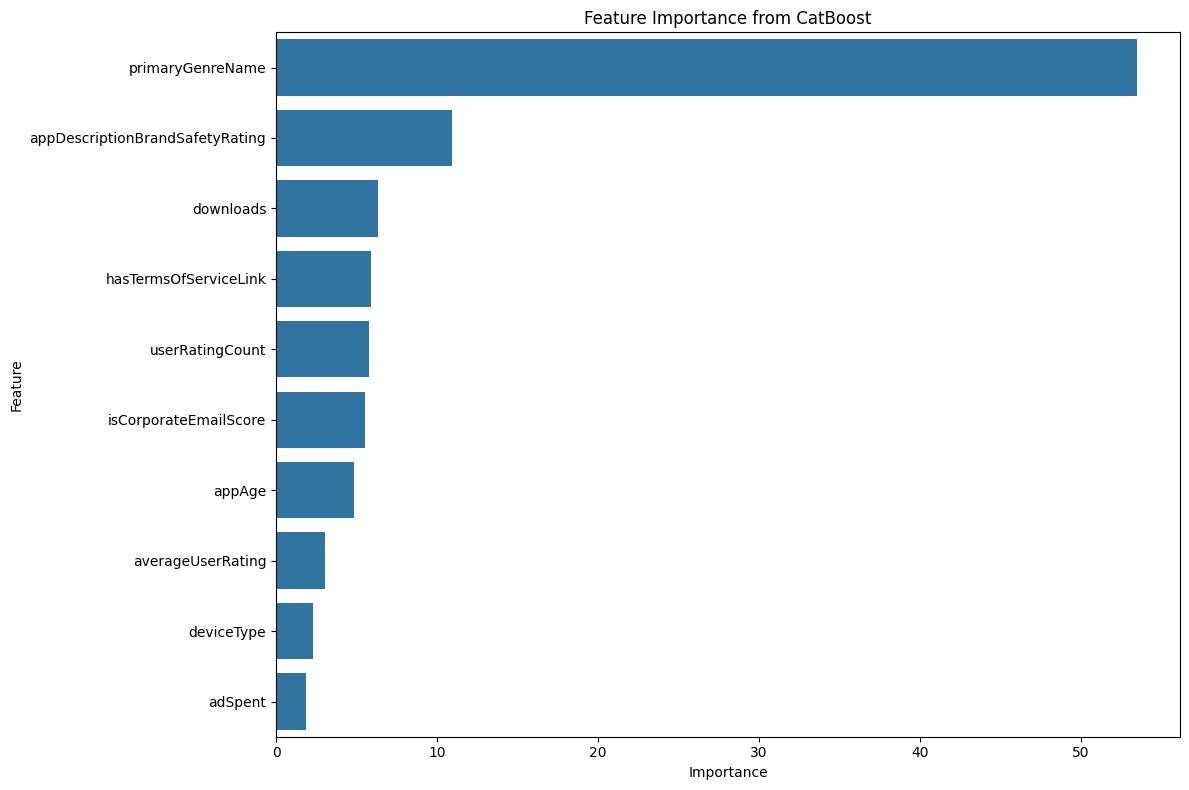

In [62]:
feature_importances = cb_model.get_feature_importance()
feature_names = categorical_cols + numerical_cols
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title('Feature Importance from CatBoost')
plt.tight_layout()
plt.savefig('catboost_feature_importance.png')
plt.show()

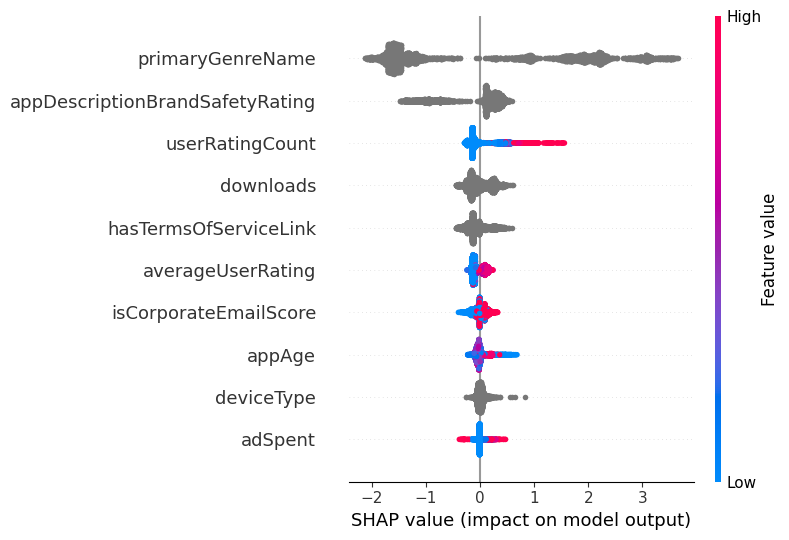

In [63]:
import shap
explainer = shap.TreeExplainer(cb_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

## CrossVal Catboost

In [ ]:
# Run custom cross-validation
cv_results = custom_cv_evaluation(df)
print(f"Cross-validated AUC scores: {cv_results}")
print(f"Mean AUC: {np.mean(cv_results):.4f} (±{np.std(cv_results):.4f})")

KeyError: 'coppaRisk'

##LGBM

In [67]:
def objective(trial):
    params = {
        'num_leaves':        trial.suggest_int('num_leaves', 31, 200),
        'max_depth':         trial.suggest_int('max_depth', -1, 20),
        'learning_rate':     trial.suggest_loguniform('learning_rate', 0.005, 0.1),
        'n_estimators':      trial.suggest_int('n_estimators', 100, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample':         trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree':  trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha':         trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
        'reg_lambda':        trial.suggest_loguniform('reg_lambda', 1e-8, 10.0)
    }
    model = LGBMClassifier(**params, objective='binary', random_state=42)
    # 5‑fold CV
    aucs = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
    return aucs.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, timeout=3600)

print("Optuna best AUC:", study.best_value)
print("Optuna best params:", study.best_params)

[I 2025-04-23 13:55:11,739] A new study created in memory with name: no-name-181b6810-8fdd-4323-9eef-9d6dfb543d5e
<ipython-input-67-d2080440f9cd>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate':     trial.suggest_loguniform('learning_rate', 0.005, 0.1),
<ipython-input-67-d2080440f9cd>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample':         trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-67-d2080440f9cd>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree':  trial.suggest_uniform('colsample

Optuna best AUC: 0.8891622746034166
Optuna best params: {'num_leaves': 136, 'max_depth': 5, 'learning_rate': 0.007376210017244686, 'n_estimators': 436, 'min_child_samples': 60, 'subsample': 0.5011000762180184, 'colsample_bytree': 0.633331941000368, 'reg_alpha': 0.0009322248722308183, 'reg_lambda': 0.03820175246757945}


In [74]:
from lightgbm import LGBMClassifier
from lightgbm.callback import early_stopping, log_evaluation
from sklearn.metrics import roc_auc_score

best_params = {
    'num_leaves': 129,
    'max_depth': 4,
    'learning_rate': 0.020860883095715006,
    'n_estimators': 132,
    'min_child_samples': 12,
    'subsample': 0.7762341937525034,
    'colsample_bytree': 0.7022270586336973,
    'reg_alpha': 0.008687073040772767,
    'reg_lambda': 1.213428061810927e-06
}

lgbm_model = LGBMClassifier(
    **best_params,
    objective='binary',
    random_state=42,
    categorical_feature=categorical_cols
)

for df in (X_train, X_val):
    for c in categorical_cols:
        df[c] = df[c].astype('category')

In [76]:
from lightgbm.callback import early_stopping, log_evaluation

lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='auc',
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=50)
    ]
)
y_val_pred_proba = lgbm_model.predict_proba(X_val, num_iteration=lgbm_model.best_iteration_)[:, 1]
print("AUC:", roc_auc_score(y_val, y_val_pred_proba))

[LightGBM] [Warning] categorical_feature is set=primaryGenreName,appDescriptionBrandSafetyRating,deviceType,downloads,hasTermsOfServiceLink, categorical_column=0,1,2,3,4 will be ignored. Current value: categorical_feature=primaryGenreName,appDescriptionBrandSafetyRating,deviceType,downloads,hasTermsOfServiceLink
[LightGBM] [Info] Number of positive: 557, number of negative: 5039
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 5596, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.099535 -> initscore=-2.202398
[LightGBM] [Info] Start training from score -2.202398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py:2118: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py:2140: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")
/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py:2118: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py:2140: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


In [70]:
def find_best_threshold(y_true, y_probs):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_probs)
    f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
    best_idx = np.argmax(f1s)
    return thresholds[best_idx], f1s[best_idx]

best_thresh, best_f1 = find_best_threshold(y_val, y_val_pred_proba)
print(f"Best threshold: {best_thresh:.4f} | Best F1: {best_f1:.4f}")

Best threshold: 0.2605 | Best F1: 0.4986


##Stacking

In [84]:
# 1) Get LightGBM preds using its best iteration
lgb_pred = lgbm_model.predict_proba(
    X_val,
    num_iteration=lgbm_model.best_iteration_
)[:, 1]

# 2) Get CatBoost preds (CatBoost uses its best iteration by default)
cat_pred = cb_model.predict_proba(X_val)[:, 1]

# 3) Now stack
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

X_meta = np.vstack([lgb_pred, cat_pred]).T


meta = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
meta.fit(X_meta, y_val)

meta_preds = meta.predict_proba(X_meta)[:, 1]
print("Stacked AUC:", roc_auc_score(y_val, meta_preds))

Stacked AUC: 0.956460842428357


# Submission

In [86]:
# Terapkan pipeline
final_raw = custom_pipeline(eda, train=True)

# Split X dan y
X_final = final_raw[categorical_cols + numerical_cols]
y_final = final_raw['coppaRisk']

In [87]:
# Process test data
test_processed = custom_pipeline(test, train=False)

# Make sure to apply the same imputation as on training data
X_test = test_processed[categorical_cols + numerical_cols]

In [88]:
X_test

,primaryGenreName,appDescriptionBrandSafetyRating,deviceType,downloads,hasTermsOfServiceLink,userRatingCount,appAge,averageUserRating,isCorporateEmailScore,adSpent
0,Medical,low,GLOBAL,missing,False,2,81.60,5.00,1.00,0.00
1,Games,low,GLOBAL,5000-10000,True,0,24.70,0.00,0.00,0.03
2,Games,low,smartphone,missing,False,13059,40.30,4.00,1.00,9.25
3,Games,medium,GLOBAL,missing,False,0,39.23,0.00,1.00,0.00
4,Shopping,low,GLOBAL,missing,False,0,65.53,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...
2995,Productivity,low,GLOBAL,missing,True,0,94.10,0.00,1.00,0.00
2996,Business,low,GLOBAL,100-500,False,10,25.03,5.00,1.00,0.00
2997,Finance,low,GLOBAL,missing,False,2,76.00,2.00,1.00,0.00
2998,Business,low,GLOBAL,1-5,False,0,100.63,0.00,1.00,0.00


In [89]:
X_full = final_raw[categorical_cols + numerical_cols]
y_full = final_raw['coppaRisk']
X_test = test_processed[categorical_cols + numerical_cols]

# 1) Refit LightGBM on all train+val
lgbm_model = LGBMClassifier(
    num_leaves=129,
    max_depth=4,
    learning_rate=0.020860883095715006,
    n_estimators=132,
    min_child_samples=12,
    subsample=0.7762341937525034,
    colsample_bytree=0.7022270586336973,
    reg_alpha=0.008687073040772767,
    reg_lambda=1.213428061810927e-06,
    objective='binary',
    random_state=42,
    categorical_feature=categorical_cols
)

# Ensure pandas categories
for c in categorical_cols:
    X_full[c] = X_full[c].astype('category')
    X_test[c] = X_test[c].astype('category')

lgbm_model.fit(X_full, y_full)

# 2) Refit CatBoost on all train+val
cb_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='AUC',
    cat_features=categorical_cols,
    random_seed=42,
    verbose=False
)
cb_model.fit(X_full, y_full, use_best_model=True)

# 3) Build meta-features
lgb_pred_full = lgbm_model.predict_proba(X_full)[:,1]
cat_pred_full = cb_model.predict_proba(X_full)[:,1]
X_meta_full = np.vstack([lgb_pred_full, cat_pred_full]).T

# 4) Train the meta-learner with Random Forest
meta = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
meta.fit(X_meta_full, y_full)

# 5) Final test predictions & submission
lgb_test_pred = lgbm_model.predict_proba(X_test)[:,1]
cat_test_pred = cb_model.predict_proba(X_test)[:,1]
X_meta_test = np.vstack([lgb_test_pred, cat_test_pred]).T
meta_test_preds = meta.predict_proba(X_meta_test)[:,1]

<ipython-input-89-8c1c42bd0d31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_full[c] = X_full[c].astype('category')
<ipython-input-89-8c1c42bd0d31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_full[c] = X_full[c].astype('category')
<ipython-input-89-8c1c42bd0d31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

[LightGBM] [Warning] categorical_feature is set=primaryGenreName,appDescriptionBrandSafetyRating,deviceType,downloads,hasTermsOfServiceLink, categorical_column=0,1,2,3,4 will be ignored. Current value: categorical_feature=primaryGenreName,appDescriptionBrandSafetyRating,deviceType,downloads,hasTermsOfServiceLink
[LightGBM] [Info] Number of positive: 696, number of negative: 6299
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 6995, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.099500 -> initscore=-2.202797
[LightGBM] [Info] Start training from score -2.202797
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [90]:
submission = pd.DataFrame({
    'ID': test['ID'],
    'coppaRisk': meta_test_preds
})
submission.to_csv('submission_rf_meta.csv', index=False)
print("submission_rf_meta.csv written!")

submission_rf_meta.csv written!
